In [1]:
from picamera.array import PiYUVArray, PiRGBArray
from picamera import PiCamera

from scipy.signal import find_peaks, butter, filtfilt

import time
import matplotlib.pyplot as plt
import skimage as ski

# Camera resolution
res = (640, 480)

In [2]:
# To filter the noise in the image we use a 3rd order Butterworth filter

# Wn = 0.02, the cut-off frequency, acceptable values are from 0 to 1
b, a = butter(3, 0.007)

In [24]:
# Run a track detection algorithm on a single horizontal line.
# Uses YUV420 image format as the Y component corresponds to image intensity (gray image)
# and thus there is no need to convert from RGB to BW

camera = PiCamera()
        
# Check the link below for the combinations between mode and resolution
# https://picamera.readthedocs.io/en/release-1.13/fov.html#sensor-modes
camera.sensor_mode = 1
camera.resolution = res
camera.framerate = 120

# Initialize the buffer and start capturing
rawCapture = PiYUVArray(camera, size=res)
stream = camera.capture_continuous(rawCapture, format="yuv", use_video_port=True)

# Measure the time needed to process 300 images to estimate the FPS
N = 1
k = 0
t = time.time()
images = []
peaks = []

for f in stream:
    # Get the intensity component of the image (a trick to get black and white images)
    I = f.array[:, :, 0]
    images.append(I)
    
    # Reset the buffer for the next image
    rawCapture.truncate(0)
    
    # Select a horizontal line in the middle of the image
    L = I[440, :]

    # Smooth the transitions so we can detect the peaks 
    Lf = filtfilt(b, a, L)

    # Find peaks which are higher than 0.5
    p = find_peaks(Lf, height=75)
    peaks.append(p)
    #peak_x = p[0]
    #print(peak_x)
    #or x in peak_x:
        #print(x)
    # print(p)
    
    # Increment the number of processed frames
    k += 1
    if k > N:
        break
    print(k-1)
    time.sleep(5)
        
# time_elapsed = time.time() - t
# print("Elapsed {:0.2f} seconds, estimated FPS {:0.2f}".format(time_elapsed, N / time_elapsed))

# Release resources
stream.close()
rawCapture.close()
camera.close()

0


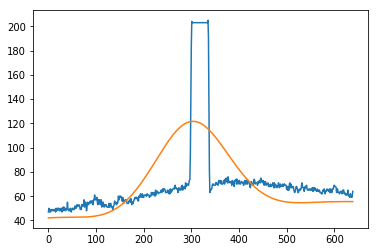

In [27]:
plt.plot(images[0][285, :])
b, a = butter(3, 0.007)
Lf = filtfilt(b, a, images[0][440, :])
plt.plot(Lf)

(array([304], dtype=int32), {'peak_heights': array([121.68345957])})


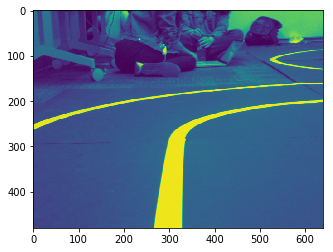

In [26]:
plt.imshow(images[0])
print(peaks[0])

(array([294], dtype=int32), {'peak_heights': array([86.57000792])})


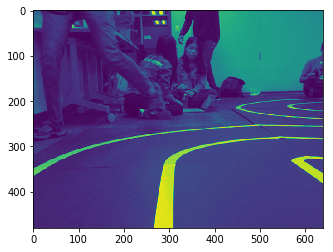

In [22]:
plt.imshow(images[0])
print(peaks[0])

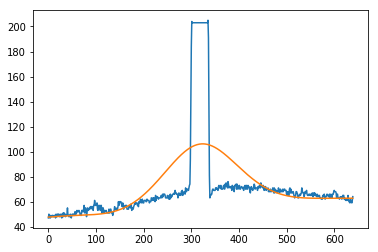

In [29]:
plt.plot(images[0][285, :])
b, a = butter(3, 0.007)
Lf = filtfilt(b, a, images[0][285, :])
plt.plot(Lf)

In [ ]:
plt.imshow(images[2])
print(peaks[2])

In [ ]:
plt.imshow(images[3])
print(peaks[3])

In [ ]:
plt.imshow(images[4])
print(peaks[4])

In [ ]:
plt.imshow(images[5])
print(peaks[5])

In [ ]:
plt.imshow(images[6])
print(peaks[6])

In [ ]:
plt.imshow(images[7])
print(peaks[7])

In [ ]:
plt.imshow(images[8])
print(peaks[8])

In [ ]:
plt.imshow(images[9])
print(peaks[9])